## 1. Fast Fourier Transfrom(FFT)

In [1]:
import pandas as pd
import math
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
# fft 함수 'get_data' 정의
def get_data(data):
    # eegRawValueVolts column 이용
    data = data['eegRawValueVolts']
    # 1초에서 25초까지의 데이터만 추출
    data = data.iloc[range(100,2500,1)]
    length = len(data)
    # Fast Fourier Transform (numpy 이용)
    fft = np.fft.fft(data)
    fft_magnitude = np.abs(fft)
    fft_spectrum = np.square(fft_magnitude)
    ifft = np.fft.ifft(fft_magnitude)
    
    # 1200을 기준으로 대칭. 우측 데이터만 이용
    fft_spec = fft_spectrum[1200:2400]
    return fft_spec

In [3]:
# fft 확인
num = 1

for n in range(num):
    name = 'data/sad_' + str(n) +'.csv'
    data = pd.read_csv(name, error_bad_lines=False)
    fft_spec = get_data(data)

In [4]:
len(fft_spec)

1200

## 뇌파 종류와 주파수 범위[Hz] 정의 및 뇌파 별 분류
* Delta frequency : 0.1 - 4
* Theta frequency : 4 - 8
* AlphaLow frequency : 8 - 10
* AlphaHigh frequency : 10 - 13
* BetaLow frequency : 13 - 18
* BetaHigh frequency : 18 - 30
* GammaLow frequency : 30 - 40
* GammaMid frequency : 40 - 50

In [5]:
# 각 뇌파 사이 criteria 정의
start_cri = int(1200 / 50 * 0.1)
DT_cri = int(1200 / 50 * 4)
TAl_cri = int(1200 / 50 * 8)
AlAh_cri = int(1200 / 50 * 10)
AhBl_cri = int(1200 / 50 * 13)
BlBh_cri = int(1200 / 50 * 18)
BhGl_cri = int(1200 / 50 * 30)
GlGm_cri = int(1200 / 50 * 40)

In [6]:
# 뇌파 별 분류
Delta = fft_spec[start_cri:DT_cri]
Theta = fft_spec[DT_cri:TAl_cri]
AlphaLow = fft_spec[TAl_cri:AlAh_cri]
AlphaHigh = fft_spec[AlAh_cri:AhBl_cri]
BetaLow = fft_spec[AhBl_cri:BlBh_cri]
BetaHigh = fft_spec[BlBh_cri:BhGl_cri]
GammaLow = fft_spec[BhGl_cri:GlGm_cri]
GammaMid = fft_spec[GlGm_cri:]

## 2. DataFrame 생성

* Happy DataFrame (target = 0)

In [7]:
# DataFrame 생성 함수 정의
def get_result_df(emotion, num_data, target):
    temp_df = pd.DataFrame()
    brain_wave = ['Delta', 'Theta', 'AlphaLow', 'AlphaHigh', 'BetaLow', 'BetaHigh',
              'GammaLow', 'GammaMid']

    for n in range(num_data+1):
        name = 'data/'+ emotion + '_' + str(n) +'.csv'
        data = pd.read_csv(name, error_bad_lines=False)
        fft_spec = get_data(data)
        # 뇌파 분류 및 비율 계산
        Delta = fft_spec[start_cri:DT_cri].sum() / len(fft_spec[start_cri:DT_cri]) 
        Theta = fft_spec[DT_cri:TAl_cri].sum() / len(fft_spec[DT_cri:TAl_cri])
        AlphaLow = fft_spec[TAl_cri:AlAh_cri].sum() / len(fft_spec[TAl_cri:AlAh_cri])
        AlphaHigh = fft_spec[AlAh_cri:AhBl_cri].sum() / len(fft_spec[AlAh_cri:AhBl_cri])
        BetaLow = fft_spec[AhBl_cri:BlBh_cri].sum() / len(fft_spec[AhBl_cri:BlBh_cri])
        BetaHigh = fft_spec[BlBh_cri:BhGl_cri].sum() / len(fft_spec[BlBh_cri:BhGl_cri])
        GammaLow = fft_spec[BhGl_cri:GlGm_cri].sum() / len(fft_spec[BhGl_cri:GlGm_cri])
        GammaMid = fft_spec[GlGm_cri:].sum() / len(fft_spec[GlGm_cri:])
        # DataFrame record 생성
        new_row = {'Delta':Delta, 'Theta':Theta, 'AlphaLow':AlphaLow, 
           'AlphaHigh':AlphaHigh, 'BetaLow':BetaLow, 'BetaHigh':BetaHigh, 
           'GammaLow':GammaLow, 'GammaMid':GammaMid}
        temp_df = temp_df.append(pd.Series(new_row), ignore_index=True)

    temp_df = temp_df[brain_wave]
    # Record별 brain wave 비율 계산
    temp_df['sum'] = temp_df.sum(axis=1)
    for wave in brain_wave:
        temp_df[wave] = temp_df[wave] / temp_df['sum']
    temp_df.drop('sum', axis=1, inplace=True)
    temp_df['target'] = target

    return temp_df

In [8]:
# happy_df target = 0
# happy data: 128개
happy_df = get_result_df('happy', num_data = 128, target = 0)
happy_df

,Delta,Theta,AlphaLow,AlphaHigh,BetaLow,BetaHigh,GammaLow,GammaMid,target
0,0.096494,0.106731,0.089205,0.129719,0.165946,0.198439,0.107642,0.105825,0
1,0.022036,0.024554,0.025769,0.025837,0.026813,0.038597,0.153249,0.683145,0
2,0.172285,0.167949,0.166167,0.118133,0.104320,0.099117,0.067440,0.104588,0
3,0.163685,0.141831,0.159324,0.159762,0.122647,0.090905,0.065070,0.096776,0
4,0.159220,0.138152,0.133228,0.162818,0.100186,0.078691,0.079785,0.147920,0
...,...,...,...,...,...,...,...,...,...
124,0.083790,0.076785,0.093461,0.094188,0.097942,0.129843,0.188943,0.235049,0
125,0.083790,0.076785,0.093461,0.094188,0.097942,0.129843,0.188943,0.235049,0
126,0.075936,0.079866,0.088127,0.083993,0.083081,0.088369,0.155773,0.344855,0
127,0.097657,0.085188,0.128643,0.089691,0.105409,0.144683,0.136262,0.212468,0


* Sad DataFrame (target = 1)

In [9]:
# sad_df target = 1
# sad data: 145개
sad_df = get_result_df('sad', num_data = 145, target = 1)
sad_df

,Delta,Theta,AlphaLow,AlphaHigh,BetaLow,BetaHigh,GammaLow,GammaMid,target
0,0.104271,0.105994,0.122069,0.124697,0.163349,0.190169,0.086072,0.103379,1
1,0.035179,0.035861,0.036640,0.034406,0.041011,0.066837,0.413901,0.336165,1
2,0.108910,0.117642,0.119850,0.121690,0.133633,0.181790,0.097334,0.119151,1
3,0.108341,0.119117,0.130316,0.135112,0.164113,0.144437,0.079628,0.118935,1
4,0.117082,0.150969,0.120062,0.114594,0.149157,0.140734,0.088972,0.118430,1
...,...,...,...,...,...,...,...,...,...
141,0.131837,0.115243,0.121016,0.139324,0.116523,0.130439,0.130851,0.114767,1
142,0.059829,0.079274,0.073964,0.083383,0.084464,0.134171,0.217941,0.266974,1
143,0.048491,0.049267,0.057249,0.064491,0.111108,0.102738,0.164236,0.402420,1
144,0.116581,0.075531,0.114814,0.094070,0.135524,0.206841,0.126317,0.130321,1


In [10]:
# result datafrmae 생성 (happy, sad dataframe)
result_df = happy_df.append(sad_df, ignore_index=True)

result_df.to_csv('data/result_df.csv', index=False)

In [11]:
print(result_df.shape)
result_df.head()

(275, 9)


,Delta,Theta,AlphaLow,AlphaHigh,BetaLow,BetaHigh,GammaLow,GammaMid,target
0,0.096494,0.106731,0.089205,0.129719,0.165946,0.198439,0.107642,0.105825,0
1,0.022036,0.024554,0.025769,0.025837,0.026813,0.038597,0.153249,0.683145,0
2,0.172285,0.167949,0.166167,0.118133,0.104320,0.099117,0.067440,0.104588,0
3,0.163685,0.141831,0.159324,0.159762,0.122647,0.090905,0.065070,0.096776,0
4,0.159220,0.138152,0.133228,0.162818,0.100186,0.078691,0.079785,0.147920,0


## 3. Data preprocessing

### * happy, sad 파장 별 correlation 확인

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest

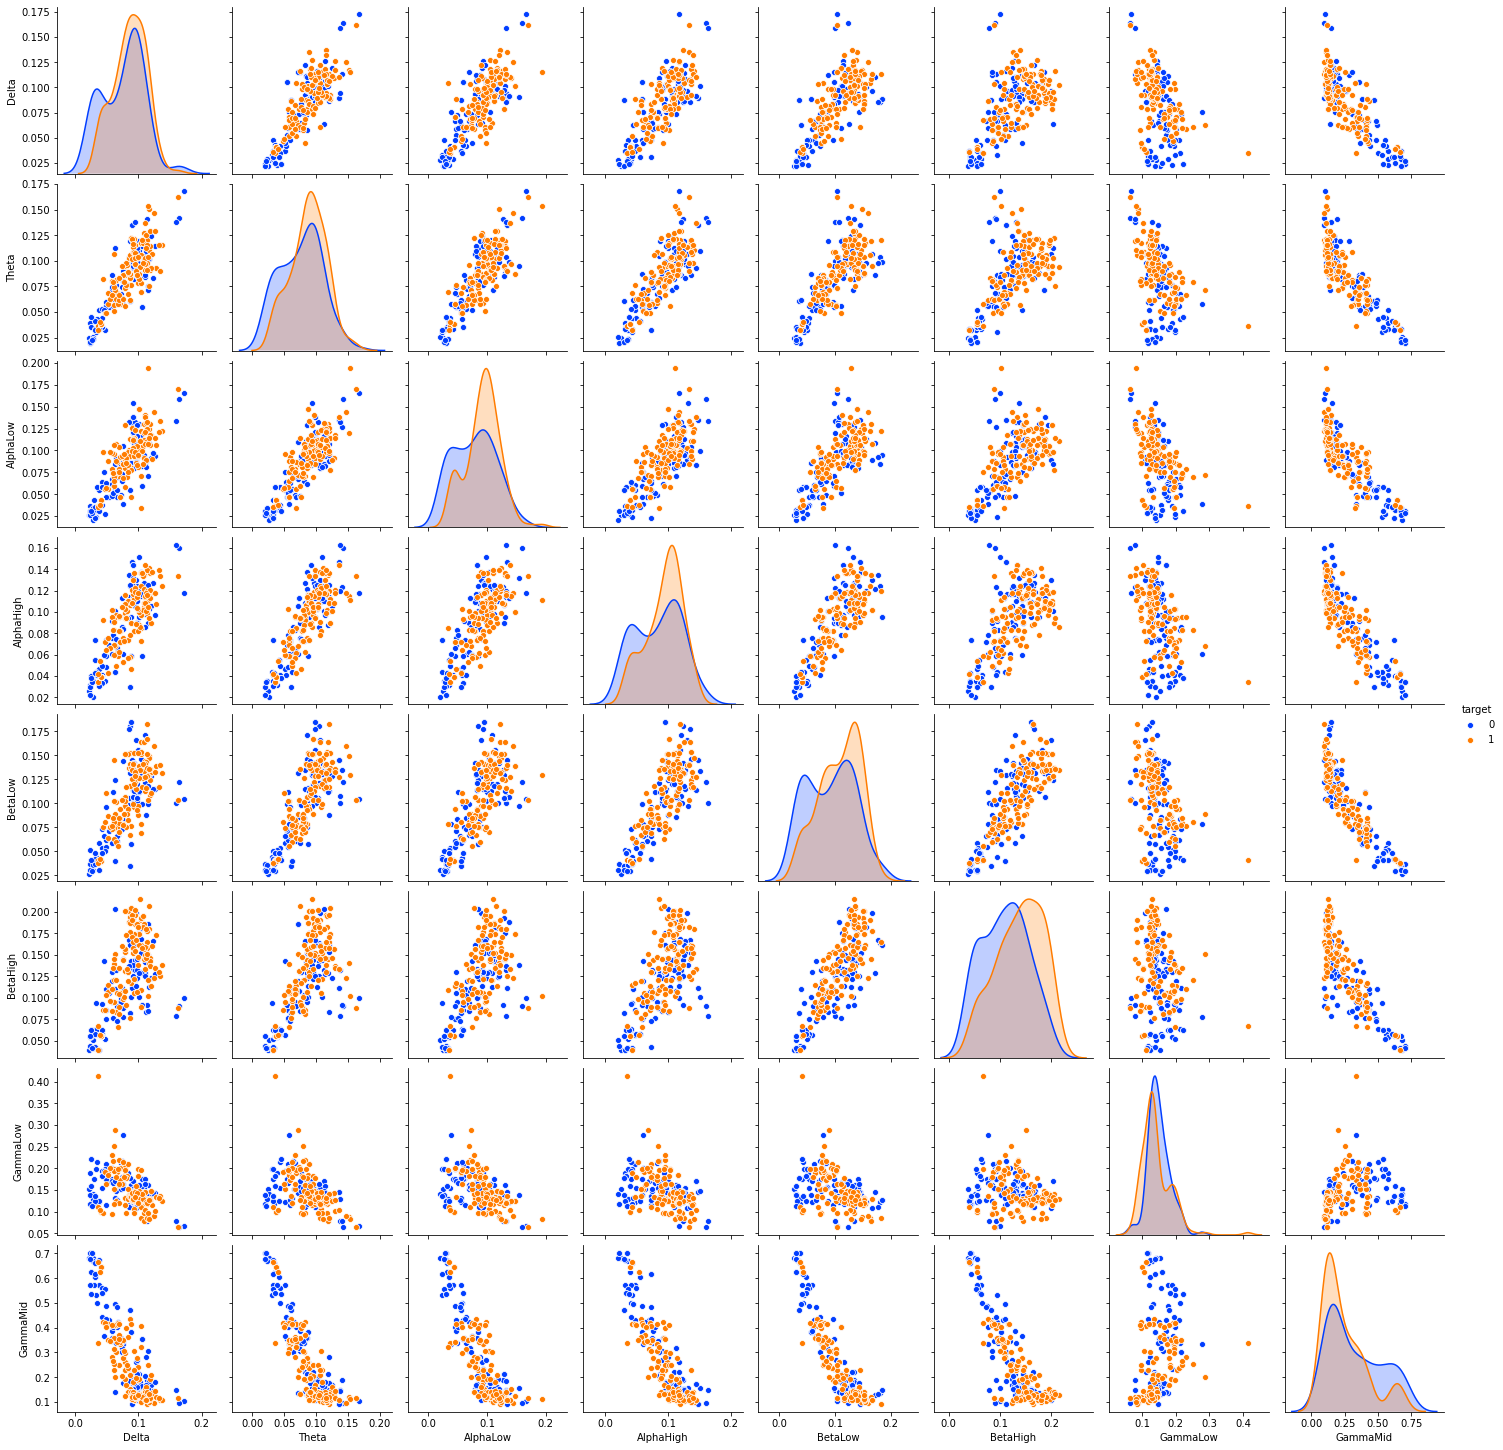

In [13]:
sns.pairplot(result_df, 
             diag_kind='kde',
             hue="target", 
             palette='bright')
plt.show()

### * Boxplot - outlier 확인

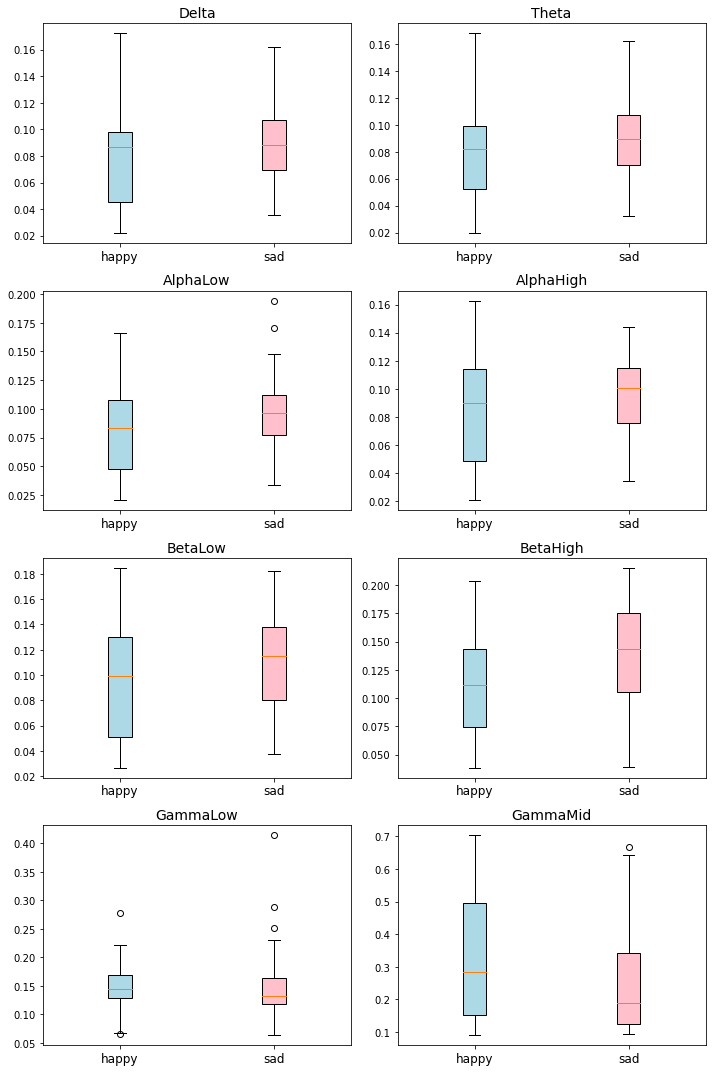

In [14]:
brain_waves = list(result_df.columns[:8])

fig, axes = plt.subplots(4, 2, figsize=(10, 15))
for i, wave in enumerate(brain_waves):
        box = axes[i//2, i%2].boxplot([result_df[result_df['target'] == 0][wave], 
                                       result_df[result_df['target'] == 1][wave]], patch_artist=True)
        axes[i//2, i%2].set_title(wave, fontsize=14)
        axes[i//2, i%2].set_xticklabels(['happy', 'sad'], fontsize=12)
        colors = ['lightblue', 'pink']
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)

fig.tight_layout()
plt.show()

### * outlier 제거

In [15]:
data_copy = result_df.copy()

# 50개의 노드 수, 최대 50개의 샘플
# 0.04%의 outlier 색출.
clf=IsolationForest(n_estimators=50, max_samples=50, contamination=float(0.2), 
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=None, verbose=0,behaviour="new")
# 전체 data set의 oulier
clf.fit(data_copy)
pred = clf.predict(data_copy)
data_copy['anomaly']=pred
outliers=data_copy.loc[data_copy['anomaly']==-1]
outlier_index=list(outliers.index)

print('data_set')
print(data_copy['anomaly'].value_counts())

data_set
 1    220
-1     55
Name: anomaly, dtype: int64


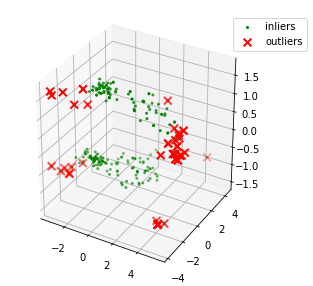

In [16]:
# 전체 dataset outlier 3D
pca = PCA(n_components=3) 
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(data_copy)
X_reduce = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
# 전체 dataset inliers plot - green
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1,label="inliers",c="green")
# 전체 dataset outliers plot - red
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend(loc="right",  bbox_to_anchor=(1.2, 0.9))
plt.show()

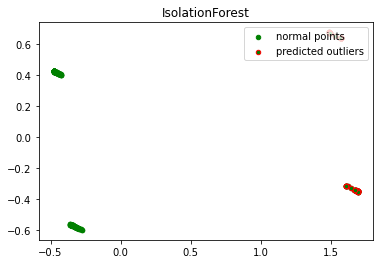

In [17]:
# 전체 dataset outlier 2D
pca = PCA(2)
pca.fit(data_copy)
res=pd.DataFrame(pca.transform(data_copy))

plt.title("IsolationForest")
# 전체 dataset와 train data의 inliers plot - green
b1 = plt.scatter(res[0], res[1], c='green', s=20,label="normal points")
# 전체 dataset와 train data의 outliers plot - red
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [18]:
data_copy = data_copy[data_copy['anomaly']==1]
data_copy.drop('anomaly', axis=1, inplace=True)

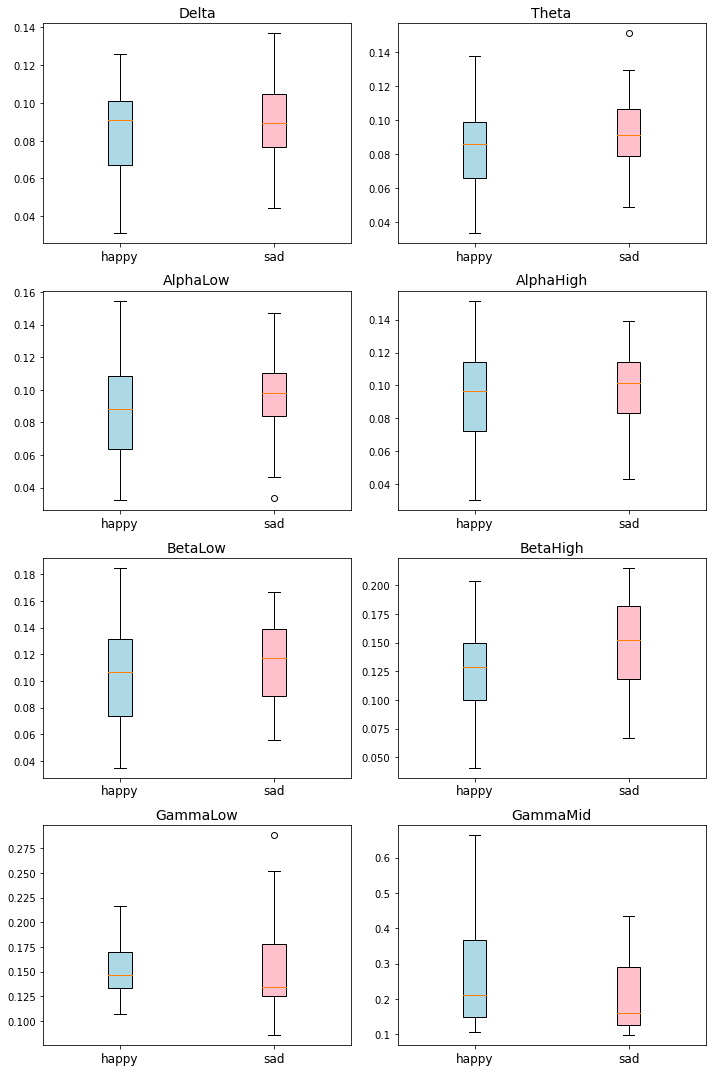

In [19]:
# outlier 제거 확인
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
for i, wave in enumerate(brain_waves):
        box = axes[i//2, i%2].boxplot([data_copy[data_copy['target'] == 0][wave],
                                       data_copy[data_copy['target'] == 1][wave]], patch_artist=True)
        axes[i//2, i%2].set_title(wave, fontsize=14)
        axes[i//2, i%2].set_xticklabels(['happy', 'sad'], fontsize=12)
        colors = ['lightblue', 'pink']
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)

fig.tight_layout()
plt.show()

## 4. Modeling - Lightgbm

In [21]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_idx, test_idx in split.split(result_df, result_df["target"]):
    df_train = result_df.loc[train_idx]
    df_test = result_df.loc[test_idx]

X_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']
X_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(220, 8) (55, 8)
(220,) (55,)


### * outlier 제거되지 않은 데이터로 학습 및 평가

In [23]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, objective='binary')

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.674431
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.656468
[3]	valid_0's binary_logloss: 0.643579
[4]	valid_0's binary_logloss: 0.636317
[5]	valid_0's binary_logloss: 0.633145
[6]	valid_0's binary_logloss: 0.626661
[7]	valid_0's binary_logloss: 0.620927
[8]	valid_0's binary_logloss: 0.622106
[9]	valid_0's binary_logloss: 0.607828
[10]	valid_0's binary_logloss: 0.604398
[11]	valid_0's binary_logloss: 0.594466
[12]	valid_0's binary_logloss: 0.589931
[13]	valid_0's binary_logloss: 0.575588
[14]	valid_0's binary_logloss: 0.57397
[15]	valid_0's binary_logloss: 0.570578
[16]	valid_0's binary_logloss: 0.567992
[17]	valid_0's binary_logloss: 0.565636
[18]	valid_0's binary_logloss: 0.557428
[19]	valid_0's binary_logloss: 0.555225
[20]	valid_0's binary_logloss: 0.553768
[21]	valid_0's binary_logloss: 0.554938
[22]	valid_0's binary_logloss: 0.551994
[23]	valid_0's binary_logloss: 0.553387
[24]	valid_0's binary_logloss

LGBMClassifier(n_estimators=400, objective='binary')

In [24]:
scores = cross_val_score(lgbm_wrapper, X_train, y_train, cv=3)

print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.7027027  0.75342466 0.82191781]
cross-val-score.mean 
0.759


In [25]:
y_pred = lgbm_wrapper.predict(X_test)
accuracy_score(y_test, y_pred)

0.7454545454545455

### * outlier 제거된 데이터로 학습 및 평가

In [26]:
# outlier제거한 데이터로 학습 및 평가
X_train = data_copy.drop(['target'], axis=1)
y_train = data_copy['target']

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.665686
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.650057
[3]	valid_0's binary_logloss: 0.633618
[4]	valid_0's binary_logloss: 0.617497
[5]	valid_0's binary_logloss: 0.600454
[6]	valid_0's binary_logloss: 0.591019
[7]	valid_0's binary_logloss: 0.583216
[8]	valid_0's binary_logloss: 0.575446
[9]	valid_0's binary_logloss: 0.566099
[10]	valid_0's binary_logloss: 0.560829
[11]	valid_0's binary_logloss: 0.550558
[12]	valid_0's binary_logloss: 0.548369
[13]	valid_0's binary_logloss: 0.536084
[14]	valid_0's binary_logloss: 0.535772
[15]	valid_0's binary_logloss: 0.527574
[16]	valid_0's binary_logloss: 0.513399
[17]	valid_0's binary_logloss: 0.513634
[18]	valid_0's binary_logloss: 0.51275
[19]	valid_0's binary_logloss: 0.500712
[20]	valid_0's binary_logloss: 0.495823
[21]	valid_0's binary_logloss: 0.495597
[22]	valid_0's binary_logloss: 0.492381
[23]	valid_0's binary_logloss: 0.489563
[24]	valid_0's binary_logloss

LGBMClassifier(n_estimators=400, objective='binary')

In [27]:
scores = cross_val_score(lgbm_wrapper, X_train, y_train, cv=3)

print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.56756757 0.64383562 0.50684932]
cross-val-score.mean 
0.573


In [28]:
y_pred = lgbm_wrapper.predict(X_test)
accuracy_score(y_test, y_pred)

0.8545454545454545

### * 하이퍼 파라미터 최적화

In [29]:
kfold = StratifiedKFold(n_splits=3)
dtree=LGBMClassifier()

parameters = {'learning_rate':[0.01,0.03,0.05,0.07,0.09],'max_depth':[5,7,9,11,13,15],'num_leaves':[5,6,7,8,9,10],
              'objective':['binary'],'boosting_type':['gbdt', 'dart', 'goss']}
gcv = GridSearchCV(dtree, param_grid=parameters, cv=kfold,scoring='accuracy', refit=True) #  scoring = f1
gcv.fit(X_train, y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수


model=gcv.best_estimator_  # 최적의 파라미터로 모델 생성
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

final params {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 5, 'objective': 'binary'}
best score 0.6045908922621251


0.6909090909090909

In [30]:
pred_proba = model.predict_proba(X_test)
pred_proba

array([[0.4232563 , 0.5767437 ],
       [0.28481404, 0.71518596],
       [0.28481404, 0.71518596],
       [0.41916487, 0.58083513],
       [0.47444425, 0.52555575],
       [0.45231447, 0.54768553],
       [0.30901393, 0.69098607],
       [0.32061104, 0.67938896],
       [0.56707883, 0.43292117],
       [0.28481404, 0.71518596],
       [0.3545974 , 0.6454026 ],
       [0.32060772, 0.67939228],
       [0.44399427, 0.55600573],
       [0.69126022, 0.30873978],
       [0.49325547, 0.50674453],
       [0.71029606, 0.28970394],
       [0.28481404, 0.71518596],
       [0.42548969, 0.57451031],
       [0.56734178, 0.43265822],
       [0.31143735, 0.68856265],
       [0.64953087, 0.35046913],
       [0.36129723, 0.63870277],
       [0.49624404, 0.50375596],
       [0.4895612 , 0.5104388 ],
       [0.33248948, 0.66751052],
       [0.33396608, 0.66603392],
       [0.4511535 , 0.5488465 ],
       [0.4511535 , 0.5488465 ],
       [0.64953087, 0.35046913],
       [0.69583103, 0.30416897],
       [0.

### * Feature Importance

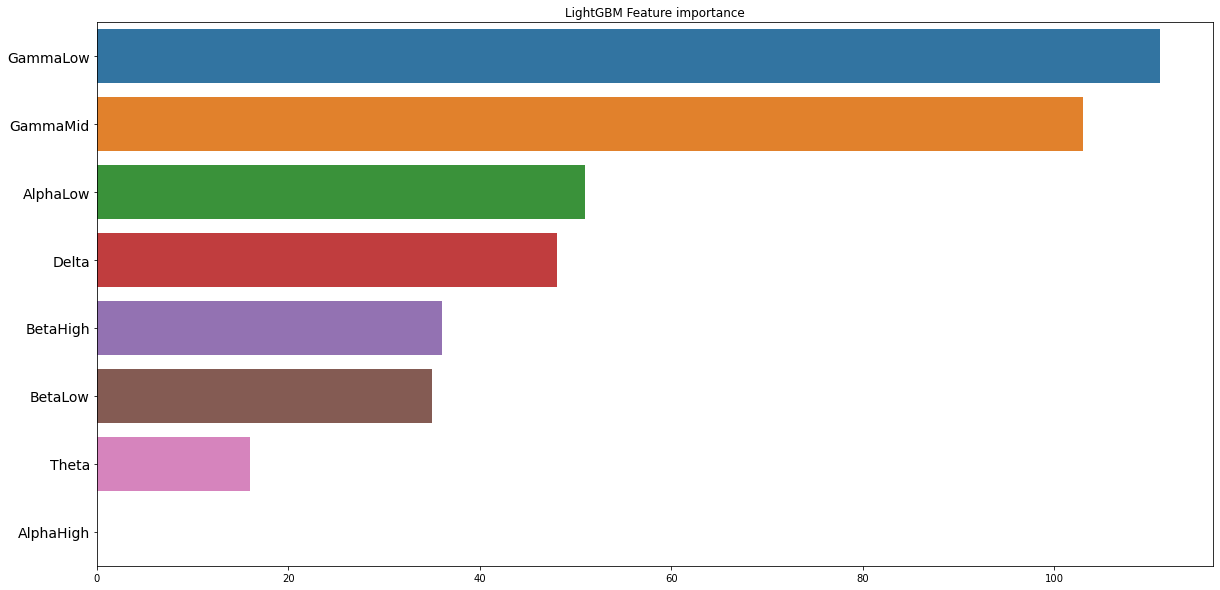

In [31]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
sns.set_palette("RdPu")
plt.title('LightGBM Feature importance')
plt.yticks(fontsize=14)
plt.ylabel(''); plt.xlabel('')
plt.show()

In [32]:
import joblib

joblib.dump(model, './emotion_model.pkl')

['./emotion_model.pkl']